In [14]:
import tensorflow as tf
import keras


print("Tensorflow version:", tf.__version__)
print("Keras version:", keras.__version__)

Tensorflow version: 2.15.0
Keras version: 3.2.1


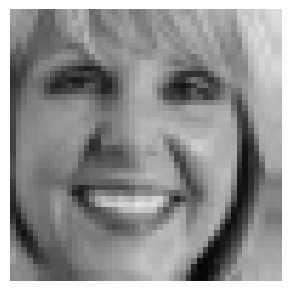

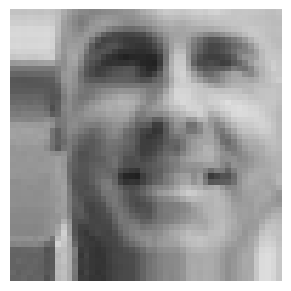

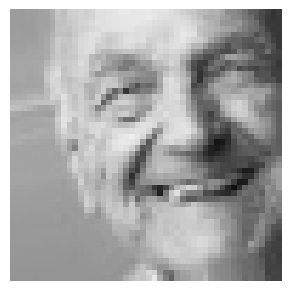

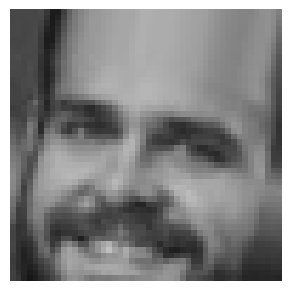

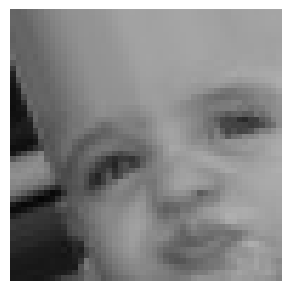

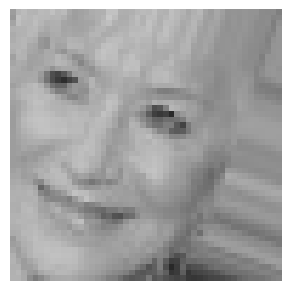

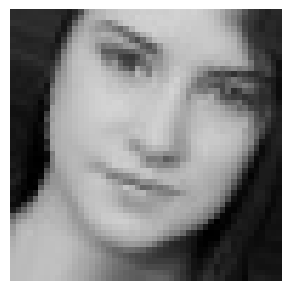

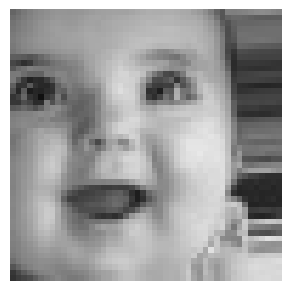

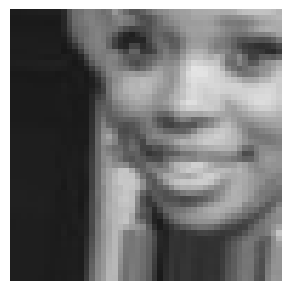

In [15]:
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2


images = glob("/kaggle/input/multi-region-facial-dataset/Multi Region Facial Dataset/train/**/**")
for i in range (9):
    Image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(Image));plt.axis('off')

Preparing Data for Training

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("/kaggle/input/multi-region-facial-dataset/Multi Region Facial Dataset/train",
                                                    target_size= (img_size,img_size),
                                                    color_mode= "grayscale",
                                                    batch_size= batch_size,
                                                    class_mode= "categorical",
                                                    shuffle=True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("/kaggle/input/multi-region-facial-dataset/Multi Region Facial Dataset/test",
                                                    target_size= (img_size,img_size),
                                                    color_mode= "grayscale",
                                                    batch_size= batch_size,
                                                    class_mode= "categorical",
                                                    shuffle=True)

Found 18961 images belonging to 5 classes.
Found 4743 images belonging to 5 classes.


Defining Model

In [17]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout, Conv2D
from tensorflow.keras.layers import Activation, MaxPooling2D


def Convolution(input_tensor, filter, kernel_size):
    x = Conv2D(filters=filter, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)

    return x

In [18]:
from tensorflow.keras.layers import Dense, Dropout


def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)

    return x

In [19]:
from tensorflow.keras.layers import Flatten, Input
from tensorflow.keras.models import Model

def model_fer(inputs):
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1 ,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)

    dense_1 = Dense_f(flatten,256)

    output = Dense(5,activation= "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])  # Use 'inputs' instead of 'input'
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])

    return model

In [20]:
# Define the input shape
input_shape = (48,48,1)

# Create an Input layer
input_layer = Input(shape=input_shape)

# Pass the input layer to your model function
model = model_fer(input_layer)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,308,549 (4.99 MB)

 Trainable params: 1,307,589 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

Initiating model

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint


epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("kaggle_model.weights.h5", monitor = 'val_accuracy', save_weights_only= True, mode='auto', verbose=1)
callbacks = [checkpoint]

Train the model

In [22]:
history = model.fit(
    x = train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/15
  5/296 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.2386 - loss: 1.8627

W0000 00:00:1716795841.712708      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


291/296 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4272 - loss: 1.5132
Epoch 1: saving model to kaggle_model.weights.h5
296/296 ━━━━━━━━━━━━━━━━━━━━ 36s 87ms/step - accuracy: 0.4279 - loss: 1.5112 - val_accuracy: 0.5038 - val_loss: 1.2706
Epoch 2/15
  1/296 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5156 - loss: 1.2113
Epoch 2: saving model to kaggle_model.weights.h5
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5156 - loss: 1.2113 - val_accuracy: 0.4286 - val_loss: 1.3097
Epoch 3/15


W0000 00:00:1716795867.684867      95 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


290/296 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5040 - loss: 1.2645
Epoch 3: saving model to kaggle_model.weights.h5
296/296 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.5044 - loss: 1.2637 - val_accuracy: 0.5198 - val_loss: 1.5658
Epoch 4/15
  1/296 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5938 - loss: 0.9873
Epoch 4: saving model to kaggle_model.weights.h5
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.5938 - loss: 0.9873 - val_accuracy: 0.7143 - val_loss: 1.5001
Epoch 5/15
291/296 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5807 - loss: 1.1016
Epoch 5: saving model to kaggle_model.weights.h5
296/296 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - accuracy: 0.5808 - loss: 1.1014 - val_accuracy: 0.5374 - val_loss: 1.2768
Epoch 6/15
  1/296 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7031 - loss: 0.9886
Epoch 6: saving model to kaggle_model.weights.h5
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - accuracy: 0.7031 - loss: 0.9886 - val_accuracy: 0.7143 - val_loss: 

In [23]:
model.evaluate(validation_generator)

75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.6417 - loss: 0.9671


[0.9718315601348877, 0.6434745788574219]

## Plotting Loss

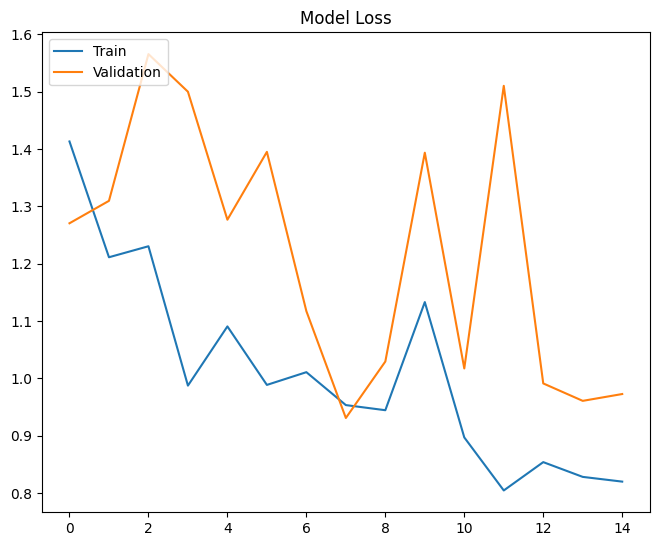

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

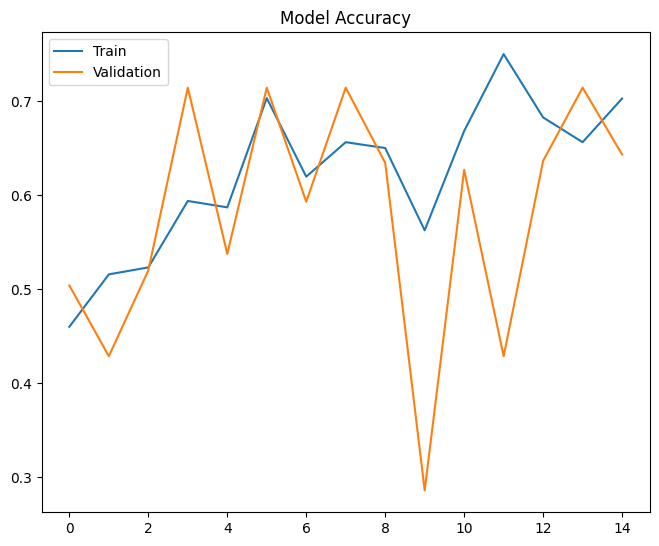

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

## Model Saving

In [26]:
model_json = model.to_json()
with open("Trained_model_kaggle.json","w") as json_file:
    json_file.write(model_json)